In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



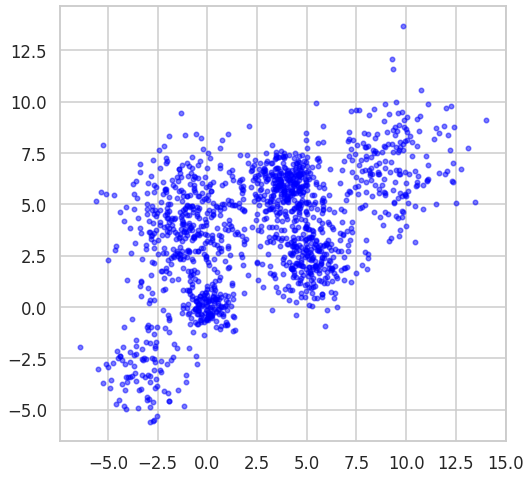

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [ ]:
print(Multi_blob_Data)

[[-2.3542716  -3.17974359]
 [-2.1580049  -1.02006119]
 [-3.30439939 -3.30437804]
 ...
 [ 9.86405669 13.6746041 ]
 [ 5.457008    9.9319843 ]
 [ 8.51133922  7.48845914]]


### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

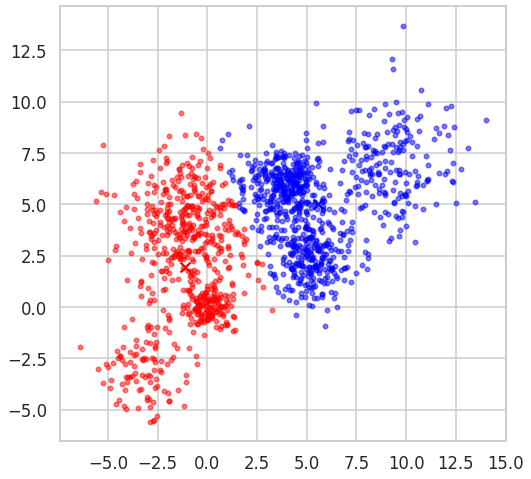

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_2 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_2,2)

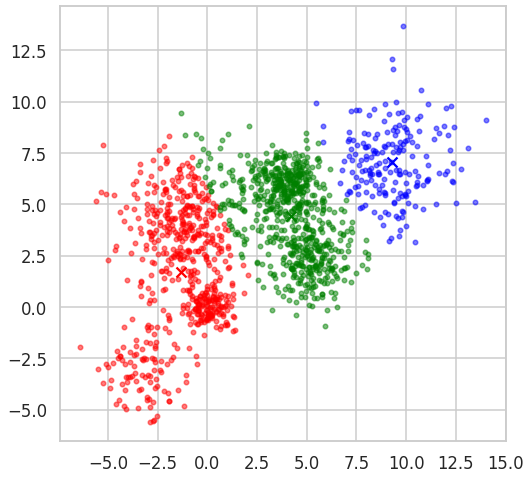

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_3 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_3,3)

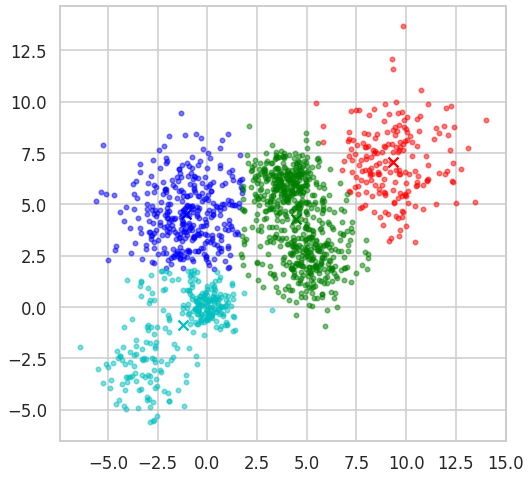

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_4 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_4,4)

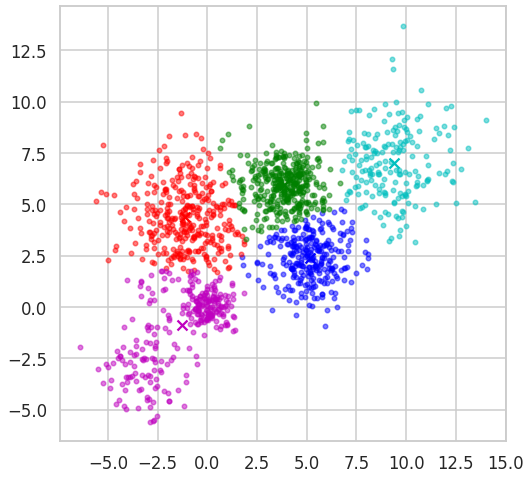

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_5 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_5,5)

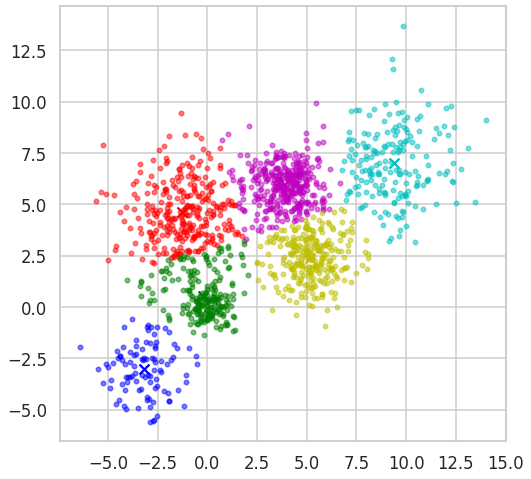

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=6,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_6 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_6,6)

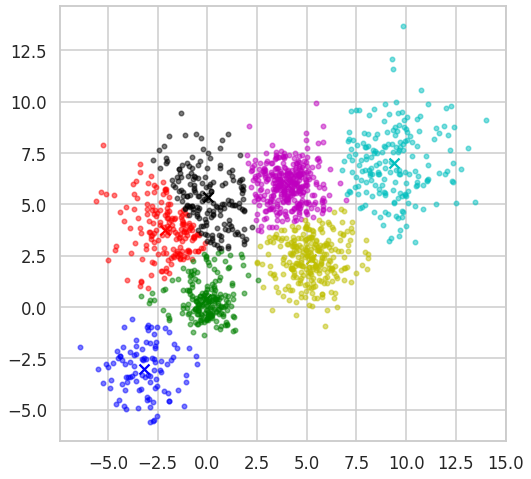

In [ ]:
kmeans = KMeans(
        init="random",
        n_clusters=7,
        n_init=10,
        max_iter=300,
        random_state=42 )
clusters_7 = kmeans.fit(Multi_blob_Data)
display_cluster(Multi_blob_Data,clusters_7,7)

Distortion function versus K

In [ ]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

In [ ]:
distortions = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(Multi_blob_Data)
  distortions.append(kmeans.inertia_)

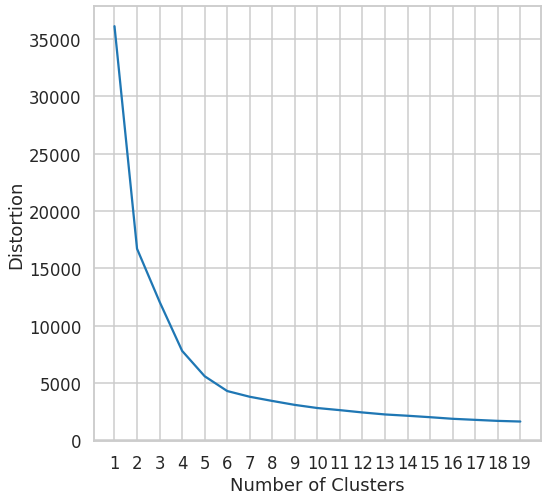

In [ ]:
plt.plot(range(1, 20), distortions)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
##According to the elbow method, the optimal number of clusters is 4 (or 6), since that's where the average distance from the centroid decreases suddenly

##The best k according to the silhouette score is 6 clusters, which matches the largest silhouette coefficient close to 1silhouette score versus K

In [ ]:
silhouette_coefficients = []
for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(Multi_blob_Data)
  score = silhouette_score(Multi_blob_Data, kmeans.labels_)
  silhouette_coefficients.append(score)

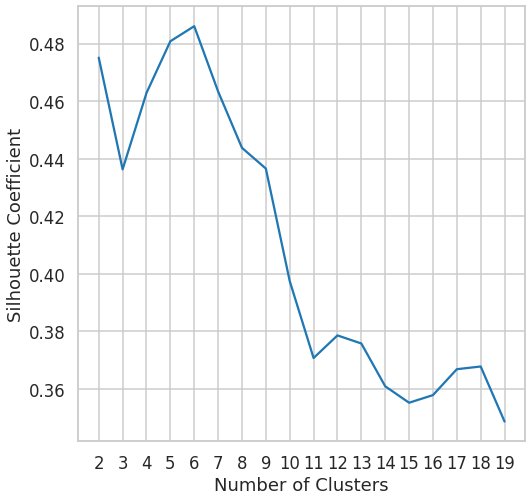

In [ ]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
##The best k according to the silhouette score is 6 clusters, which matches the largest silhouette coefficient close to 1